<a href="https://colab.research.google.com/github/Prerana-Bijekar/ML/blob/main/ML_Bonus-Assignment-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

# Function to load CSV file using Pandas
def load_csv(filepath):
    return pd.read_csv(filepath)
# Load the dataset
df = load_csv('Bank_Customer_Churn.csv')
print(df.head())

# Fill missing values for numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = df.select_dtypes(include=[object]).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# One-hot encoding for categorical variables
df = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target (y)
X = df.drop('churn', axis=1)
y = df['churn']

Saving Bank_Customer_Churn.csv to Bank_Customer_Churn (3).csv
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


In [ ]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
column_transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

X_encoded = column_transformer.fit_transform(X)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection
selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

In [ ]:
# Train Classification Models
clf_svm = SVC(probability=True)
clf_svm.fit(X_train_selected, y_train)

clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_train_selected, y_train)

GradientBoostingClassifier()

In [ ]:
# Classification Metrics
for clf, name in zip([clf_svm, clf_gb], ['SVM', 'Gradient Boosting']):
    y_pred = clf.predict(X_test_selected)
    y_proba = clf.predict_proba(X_test_selected)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    print(f"{name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

SVM Evaluation:
Accuracy: 0.8600
Precision: 0.7756
Recall: 0.4046
F1 Score: 0.5318
ROC AUC: 0.8280
Confusion Matrix:
[[1561   46]
 [ 234  159]]

Gradient Boosting Evaluation:
Accuracy: 0.8665
Precision: 0.7442
Recall: 0.4885
F1 Score: 0.5899
ROC AUC: 0.8727
Confusion Matrix:
[[1541   66]
 [ 201  192]]



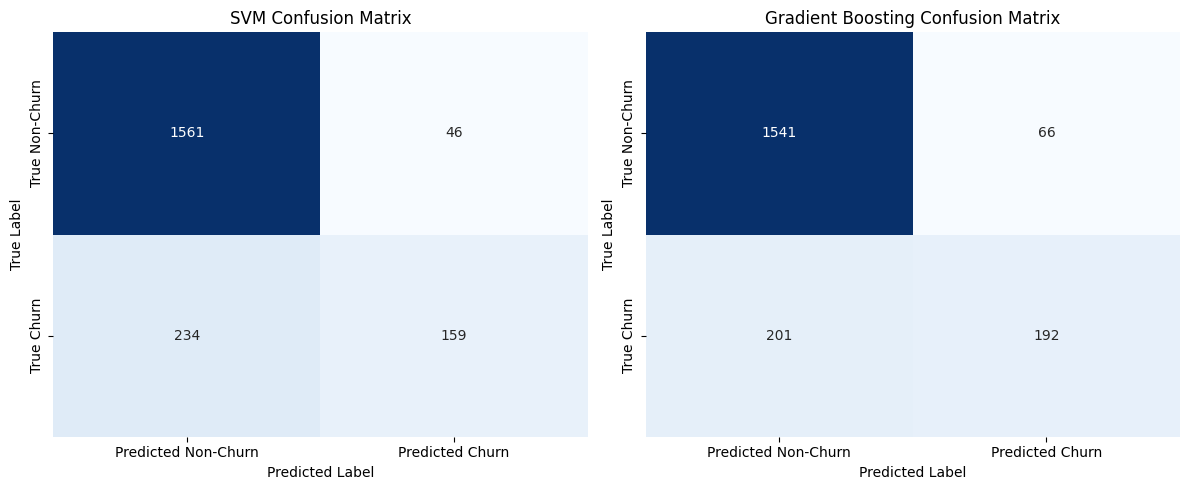

In [ ]:
# Plot Confusion Matrix for both models
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# SVM Confusion Matrix
y_pred_svm = clf_svm.predict(X_test_selected)
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False,
            xticklabels=["Predicted Non-Churn", "Predicted Churn"],
            yticklabels=["True Non-Churn", "True Churn"])
axes[0].set_title("SVM Confusion Matrix")
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# Gradient Boosting Confusion Matrix
y_pred_gb = clf_gb.predict(X_test_selected)
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', ax=axes[1], cbar=False,
            xticklabels=["Predicted Non-Churn", "Predicted Churn"],
            yticklabels=["True Non-Churn", "True Churn"])
axes[1].set_title("Gradient Boosting Confusion Matrix")
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()


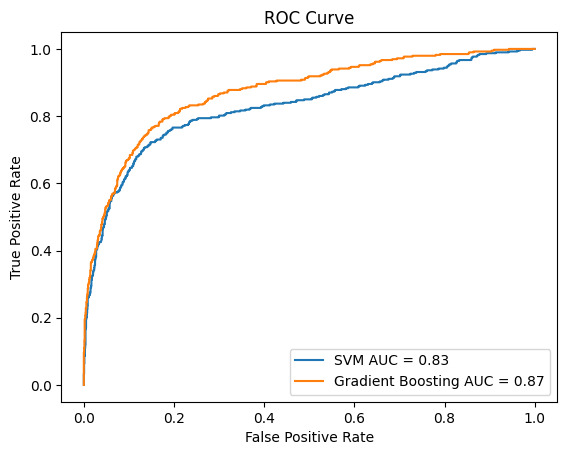

In [ ]:
# ROC Curve
for clf, name in zip([clf_svm, clf_gb], ['SVM', 'Gradient Boosting']):
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test_selected)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} AUC = {roc_auc:.2f}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
# Regression Model (Churn Probability)
reg_svm = LinearRegression()
reg_svm.fit(X_train_selected, y_train)
y_pred_svm_reg = reg_svm.predict(X_test_selected)

reg_gb = LinearRegression()
reg_gb.fit(X_train_selected, y_train)
y_pred_gb_reg = reg_gb.predict(X_test_selected)

# Regression Metrics
for y_pred_reg, name in zip([y_pred_svm_reg, y_pred_gb_reg], ['SVM Regression', 'Gradient Boosting Regression']):
    mae = mean_absolute_error(y_test, y_pred_reg)
    mse = mean_squared_error(y_test, y_pred_reg)
    rmse = np.sqrt(mse)
    roc_auc = roc_auc_score(y_test, y_pred_reg)

    print(f"{name} Evaluation:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}\n")

SVM Regression Evaluation:
MAE: 0.2806
MSE: 0.1331
RMSE: 0.3648
ROC AUC: 0.7818

Gradient Boosting Regression Evaluation:
MAE: 0.2806
MSE: 0.1331
RMSE: 0.3648
ROC AUC: 0.7818



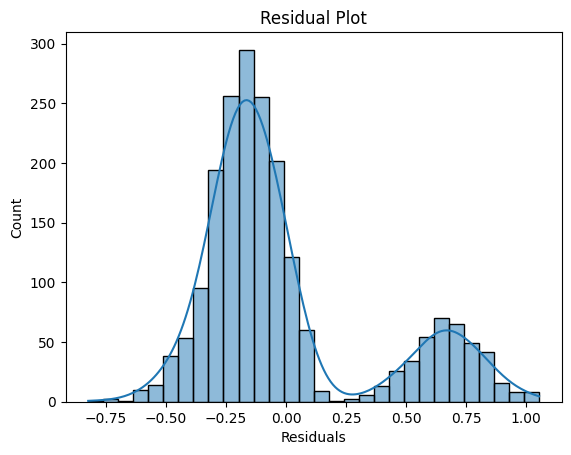

In [ ]:
# Residual Plot
residuals = y_test - y_pred_reg
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Residual Plot')
plt.show()